In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [46]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
parkinsons = fetch_ucirepo(id=174) 
  
# data (as pandas dataframes) 
X = parkinsons.data.features 
y = parkinsons.data.targets 
  
# metadata 
print(parkinsons.metadata) 
  
# variable information 
print(parkinsons.variables) 


{'uci_id': 174, 'name': 'Parkinsons', 'repository_url': 'https://archive.ics.uci.edu/dataset/174/parkinsons', 'data_url': 'https://archive.ics.uci.edu/static/public/174/data.csv', 'abstract': "Oxford Parkinson's Disease Detection Dataset", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 197, 'num_features': 22, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['status'], 'index_col': ['name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C59C74', 'creators': ['Max Little'], 'intro_paper': {'ID': 385, 'type': 'NATIVE', 'title': 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 'authors': 'Max A. Little, P. McSharry, S. Roberts, D. Costello, I. Moroz', 'venue': 'BioMedical Engineering OnLine', 'year': 2007, 'journal': None, 'DOI': '10.1186/1475-925X-6-23', 'URL

In [48]:
print("Missing values in each column:\n", X.isnull().sum())

Missing values in each column:
 MDVP:Fo         0
MDVP:Fhi        0
MDVP:Flo        0
MDVP:Jitter     0
MDVP:Jitter     0
MDVP:RAP        0
MDVP:PPQ        0
Jitter:DDP      0
MDVP:Shimmer    0
MDVP:Shimmer    0
Shimmer:APQ3    0
Shimmer:APQ5    0
MDVP:APQ        0
Shimmer:DDA     0
NHR             0
HNR             0
RPDE            0
DFA             0
spread1         0
spread2         0
D2              0
PPE             0
dtype: int64


In [49]:
print(f"Number of duplicate rows: {X.duplicated().sum()}")

Number of duplicate rows: 0


In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [52]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

PCA Explained Variance Ratio: [0.59252827 0.1130763 ]


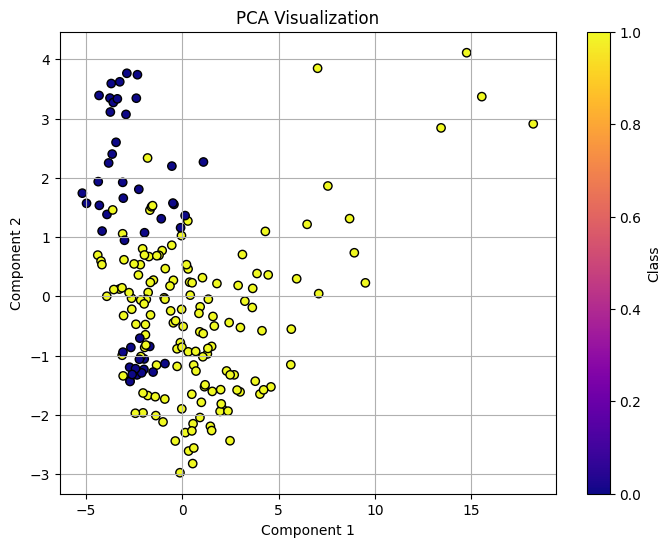

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.values.ravel(), cmap='plasma', edgecolor='k')
plt.title("PCA Visualization")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


In [54]:
# Train a logistic regression model on the PCA-transformed data
log_reg = LogisticRegression()
log_reg.fit(X_pca, y.values.ravel())

# Transform the test data using PCA
X_test_pca = pca.transform(X_test)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_pca)

# Calculate the accuracy
pca_accuracy = accuracy_score(y_test, y_pred)
print(f"PCA accuracy: {pca_accuracy}")

PCA accuracy: 0.8717948717948718


In [55]:
lda = LDA(n_components=1)  
X_lda = lda.fit_transform(X_train, y_train)

c:\Users\Eswar rao kodali\OneDrive\Desktop\UML_LAB SEM 4\myenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


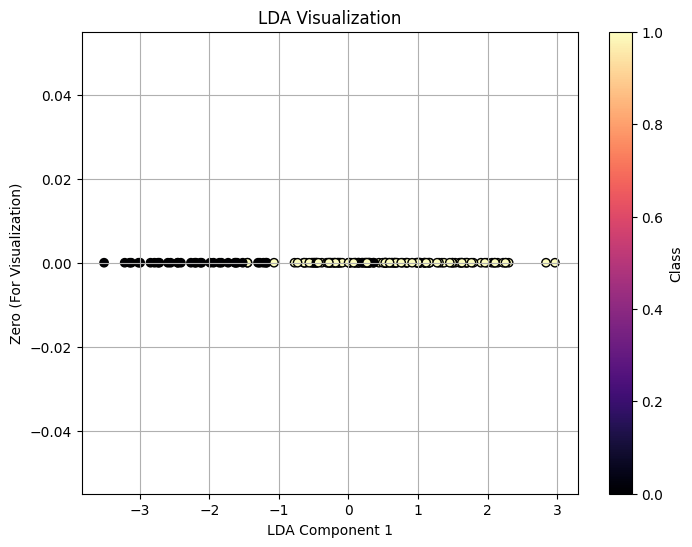

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y_train.values.ravel(), cmap='magma', edgecolor='k')
plt.title("LDA Visualization")
plt.xlabel('LDA Component 1')
plt.ylabel('Zero (For Visualization)')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

In [61]:
lda = LDA(n_components=1)
X_lda_train = lda.fit_transform(X_train, y_train)
X_lda_test = lda.transform(X_test)

model_lda = LogisticRegression()
model_lda.fit(X_lda_train, y_train)
y_pred_lda = model_lda.predict(X_lda_test)

lda_accuracy = accuracy_score(y_test, y_pred_lda)
print(f"LDA Model Accuracy: {lda_accuracy:.4f}")


LDA Model Accuracy: 0.8718


c:\Users\Eswar rao kodali\OneDrive\Desktop\UML_LAB SEM 4\myenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Eswar rao kodali\OneDrive\Desktop\UML_LAB SEM 4\myenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)
print("SVD Explained Variance Ratio:", svd.explained_variance_ratio_)

SVD Explained Variance Ratio: [0.59252827 0.1130763 ]


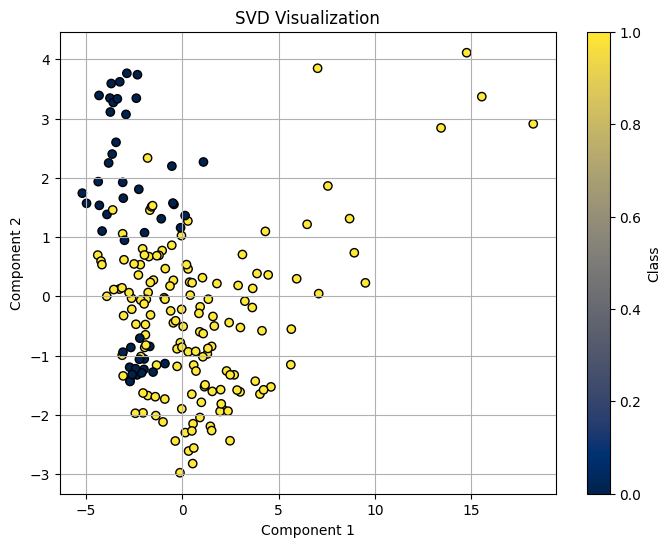

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y.values.ravel(), cmap='cividis', edgecolor='k')
plt.title("SVD Visualization")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

In [64]:
svd = TruncatedSVD(n_components=2)
X_svd_train = svd.fit_transform(X_train)
X_svd_test = svd.transform(X_test)

model_svd = LogisticRegression()
model_svd.fit(X_svd_train, y_train)
y_pred_svd = model_svd.predict(X_svd_test)

svd_accuracy = accuracy_score(y_test, y_pred_svd)
print(f"SVD Model Accuracy: {svd_accuracy:.4f}")

SVD Model Accuracy: 0.8718


c:\Users\Eswar rao kodali\OneDrive\Desktop\UML_LAB SEM 4\myenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

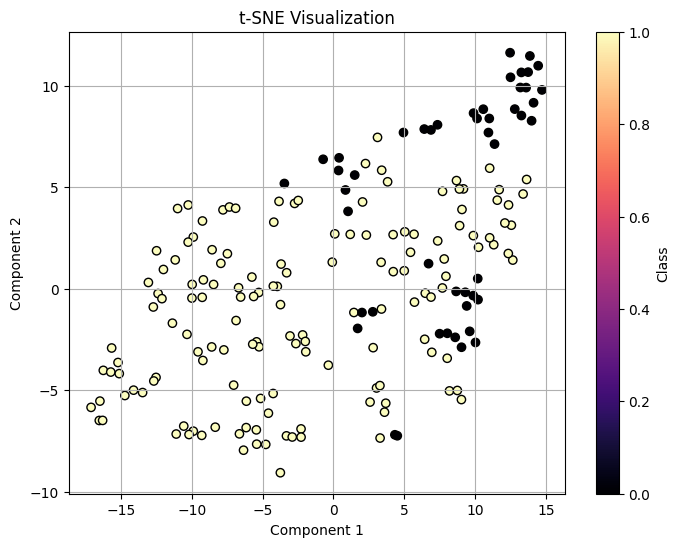

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.values.ravel(), cmap='magma', edgecolor='k')
plt.title("t-SNE Visualization")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()